# Proyecto
* Karen Fuentes
* Marco Ramirez
* Jenifer Arce

# Sección 1. Entendimiento del negocio y enfoque analítico


## Generalidades

|||
|-|-|
| **Oportunidad/problema Negocio**  |Cómo detectar noticias falsas en la política con el fin de evitar la polarización y manipulación de la opinión pública.|
| **Objetivos** |Desarrollar un modelo de aprendizaje automático capaz de identificar noticias falsas en política con alta exactitud y precisión.|
| **Criterios de éxito** |  Un alto desempeño en métricas de precisión, recall y F1-score, así como minimizar errores de tipo I y II.|
|**Organización y rol beneficiados**|El gobierno nacional,la comunidad internacional, ciudadanos y organismos electorales se verán beneficiados al tener acceso a información confiable para la toma de decisiones. |

## Impacto y enfoque analítico

La implementación de un modelo de detección de noticias falsas en Colombia y en latinoamétrica tendría un impacto sobre la polarización política y manipulación de la opinión pública, así como aumentar la confianza en las instituciones del país y en general mejorar la calidad de la información disponible para los ciudadanos.

De acuerdo con datos de Statista (2024) el 49% de personas en Latinoamérica leen por lo menos una noticia falsa al día. Por lo tanto, la realización del modelo serviría para distintos tipos de usuarios, que pueden ser ciudadanos que quieran verificar la veracidad de las noticias, o empresas que necesiten analizar muchas noticias día al día.

La categoría del análisis a realizar es **predictiva** ya que buscamos predecir si una noticia es falsa o verdadera con base a su título y descripción. El tipo de aprendizaje es **supervisado** ya que el modelo aprende de un conjunto de datos de noticias que ya estan etiquetadas como falsas o verdaderas. La tarea de aprendizaje es de **clasificación binaria** basada en si es una noticia verdadera (1) o falsa (0). Las técnicas y algoritmos a utilizar son **preprocesamiento de datos (tokenización, lematización y vectorización)** al igual que algoritmos como **Naive Bayes, Random Forest, entre otros**.

# Clonar repo para los archivos

In [98]:
# !git clone https://github.com/jennn-arce/proy1BI.git

## Usar esta línea cada vez que necesiten hacer pull

In [99]:
# %cd /content/proy1BI
# %ls
# !git pull

# 0. Carga de datos y librerías

In [100]:
# Instalación de librerías (solo necesario si no están instaladas)
!pip install contractions nltk pandas-profiling joblib num2words

# Importaciones generales
import sys
import re
import string
import unicodedata
import numpy as np
import pandas as pd
import contractions
import inflect
import matplotlib.pyplot as plt

# Procesamiento de lenguaje natural (NLP)
import nltk
from nltk import word_tokenize, sent_tokenize, PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Descarga de recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Configuración de stopwords y tokenizador
stop_words = stopwords.words('spanish')
wpt = nltk.WordPunctTokenizer()
ps = PorterStemmer()

# Modelado y machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib
# XGBoost
from xgboost import XGBClassifier

  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached MarkupSafe-2.1.5.tar.gz (19 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      Traceback (most recent call last):
        File "/Users/marcoramirez/Desktop/programming/BI/proy1BI/venv/lib/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcoramirez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marcoramirez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [101]:
def getTrainData():
    try:
        df = pd.read_csv('/content/proy1BI/fake_news_spanish.csv',
                        encoding='utf-8', sep=";")
    except:
        df = pd.read_csv('fake_news_spanish.csv',
                        encoding='utf-8', sep=";")

    return df

def getTestData():
    try:
        data_test = pd.read_csv(
            '/content/proy1BI/fake_news_test.csv', encoding='utf-8', sep=";")
    except:
        data_test = pd.read_csv('fake_news_test.csv', encoding='utf-8', 
                                sep=";")
    return data_test

df = getTrainData()
data_test = getTestData()

In [102]:
# df = pd.read_csv('fake_news_spanish.csv', encoding='utf-8', sep = ";")
# data_test = pd.read_csv('fake_news_test.csv', encoding='utf-8', sep = ";")

In [103]:
df.head(1)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023


In [104]:
print('data spanish', df.shape)
print('data test', df.shape)

data spanish (57063, 5)
data test (57063, 5)


#Sección 2. Entendimiento y preparación de los datos

# 2.1 Entendimiento de datos

In [105]:
df.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

Identificamos que las columnas de tipo object no tienen el formato correcto, estas se cambiaran más adelante.

In [106]:
df.head(10)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
5,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019
6,ID,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022
7,ID,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019
8,ID,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021
9,ID,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021


In [107]:
data_test.head(5)

,ID,Titulo,Descripcion,Fecha
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021


In [108]:
# descomentarlo cuando se vaya a entregar
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport

# perfil = ProfileReport(df, title="Perfilamiento de Datos", explorative=True)
# perfil.to_notebook_iframe()

* Número de variables: 5
* observaciones: 57063
* celdas faltantes 35339
* no hay duplicados
* lablel -> 33158 en 1 , 23905 en 0
* 16 titulos faltantes, 90.5% únicos
* 0 descripciones faltantes, 87% únicos
* faltan 61.9%fechas



###Variables categóricas

In [109]:
df.describe()

,Label
count,57063.000000
mean,0.581077
std,0.493387
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


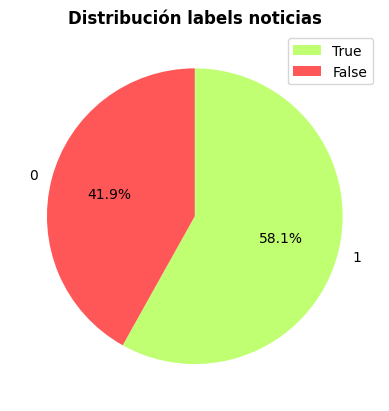

In [110]:
import matplotlib.pyplot as plt


# Plotting the value counts
label_counts = df["Label"].value_counts()
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                  counterclock=False, colors=['#c1ff72', '#ff5757'])
plt.legend(['True', 'False'])
plt.title('Distribución labels noticias', fontweight='bold')
plt.ylabel('')
plt.show()

Se puede evidenciar que de la variable **label** el valor mínimo es 0 y el máximo es 1. La media es de 0.581, es decir que el 58.1% de las noticias son verdaderas. Esto también se evidencia con la mediana ya que su valor es de 1.

Adicionalmente la variable **ID** por el momento es categorica ya que todos los valores son 'ID'. Haremos un manejo de esta variable más adelante

### Variables de texto

Las dos variables de texto identificadas son **titulo** y **descripción**. Se observa que las palabras más frecuentes son stopwords como "de", "los", "que", "la", "del", "y", "a", "por", "para". Estas serán eliminadas en la fase de preprocesamiento con **lematización**. Así mismo evicenciamos palabras con tíldes, mucha puntuación y palabras con caracteres no ASCII que puede generar ruido en los datos por lo cual se le dara un manejo en el preprocesamiento.

##Variable DateTime

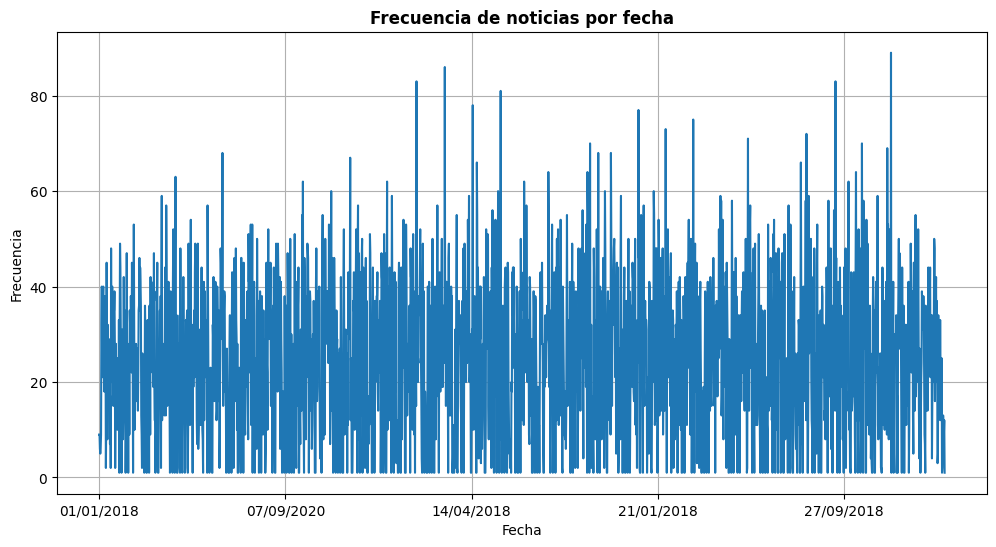

In [111]:
# Plotting the frequency of each date
conteo_fechas = df['Fecha'].value_counts().sort_index()
conteo_fechas.plot(kind='line', figsize=(12, 6))
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Frecuencia de noticias por fecha', fontweight='bold')
plt.show()

Se evidencia que las noticias a analizar son de los últimos nueve años. Con la noticia más antigua detectada siendo del 01/02/2016 y la más reciente del 28/12/2024.

# 2.2 Preparación de datos

### Completitud

In [112]:
# Cálculo de porcentaje de valores nulos por columna
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

Titulo         0.00028
ID             0.00000
Label          0.00000
Descripcion    0.00000
Fecha          0.00000
dtype: float64

### Unicidad

In [113]:
df.duplicated().sum()

np.int64(445)

In [114]:
# Duplicados parciales
numeric_cols=['Titulo','Descripcion']
for col in numeric_cols:
    num_duplicated = df.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

Titulo: 5458
Descripcion: 7425


Si una descripción se repite 2 veces puede ser para poner titulos diferentes, o fechas diferentes, y de esta manera son 2 datos únicos y que se deben tener en cuenta y no borrarlos. Pero si el titulo, la descripcion y el label se repiten, ahí si son datos no relevantes, dado que dan la misma información

## Consistencia

0 sígnfica que la noticia es falsa y 1 que es verídica

In [115]:
# Voy a revisar la columna label
print(df["Label"].value_counts())
print('='*10, 'Distribución labels', '='*10)
print('label 1:',round(df[df['Label'] == 1].shape[0]/df.shape[0],4),'%')
print('label 0:',round(df[df['Label'] == 0].shape[0]/df.shape[0],4),'%')


Label
1    33158
0    23905
Name: count, dtype: int64
========== Distribución labels ==========
label 1: 0.5811 %
label 0: 0.4189 %


##**validez**

In [116]:
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
conteo_fechas = df['Fecha'].value_counts().sort_index()
conteo_fechas

Fecha
2016-02-01    1
2016-03-03    1
2016-03-12    1
2016-04-02    1
2016-04-03    1
             ..
2024-11-02    1
2024-11-03    1
2024-11-06    1
2024-11-08    1
2024-12-11    1
Name: count, Length: 906, dtype: int64

Las fechas tienen sentido, acotando el rango de fechas de inicios de 2016 a 2024, validando que no hay datos extraños (años mucho anteriores al rango) o ninguna fecha es en el futuro, entonces todos son validos en esta medida

In [117]:
from num2words import num2words
from nltk.stem.snowball import SnowballStemmer


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode(
              'ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words


def normalize_text(text, repetar_español = False):
    if not repetar_español:
        text = text.replace('á', 'a')
        text = text.replace('é', 'e')
        text = text.replace('í', 'i')
        text = text.replace('ó', 'o')
        text = text.replace('ú', 'u')
        text = text.replace('ü', 'u')
        text = text.replace('ñ', 'n')

    # Eliminate punctuation and special characters by replacing them
    text = text.replace('(', '').replace(')', '')
    text = text.replace('[', '').replace(']', '')
    text = text.replace('{', '').replace('}', '')
    text = text.replace('<', '').replace('>', '')
    return text.lower()

def to_lowercase(words, respetar_español = False):
    return [normalize_text(word, respetar_español) for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
   """Replace all interger occurrences in list of tokenized words with textual representation"""
   new_words = []
   for word in words:
       if word.isdigit():
           new_word = num2words(word, lang='es')
           new_words.append(new_word)
       else:
           new_words.append(word)
   return new_words

def remove_stopwords(words):
    nuevas_palabras = []
    for palabra in words:
        if palabra is not None:
            if palabra not in stopwords.words('spanish'):
                nuevas_palabras.append(palabra)
    return nuevas_palabras

def corregir_contracciones_espanol(texto):
    texto = texto.replace('al ', 'a el ').replace(
        'al.', 'a el.')  # "al" a "a el"
    # "del" a "de el"    # Agrega más reglas aquí según sea necesario
    texto = texto.replace('del ', 'de el ').replace('del.', 'de el.')
    return texto

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer("spanish")
    return [stemmer.stem(word) for word in words]

def lemmatize_verbs(words):
    """Simple lemmatization for verbs in list of tokenized words"""
    # Simple rule-based lemmatization (you can extend this as needed)
    lemmatized_words = []
    for word in words:
        if word.endswith('ar'):
            lemmatized_words.append(word[:-2])  # Remove 'ar' (basic rule)
        elif word.endswith('er'):
            lemmatized_words.append(word[:-2])  # Remove 'er' (basic rule)
        elif word.endswith('ir'):
            lemmatized_words.append(word[:-2])  # Remove 'ir' (basic rule)
        else:
            # Return the word as is if no rule applies
            lemmatized_words.append(word)
    return lemmatized_words

def stem_and_lemmatize(words, stems_parameter = True, lemmas_parameter = True):
    """Stem and Lemmatize words"""
    if stems_parameter and lemmas_parameter:
        stems = stem_words(words)
        lemmas = lemmatize_verbs(words)
        return stems + lemmas
    elif lemmas_parameter:
        lemmas = lemmatize_verbs(words)
        return lemmas
    elif stems_parameter:
        stems = stem_words(words)
        return stems
    else:
        return words

def preprocessing(words, respetar_español = False, respetar_ascii = False):
    words = words.split()
    words = to_lowercase(words, respetar_español)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    if not respetar_ascii:
        words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

Estas funciones son las que nos van a ayudar a pulir los datos previo a la vectorización

In [118]:
def transfor_data(df):
    columnas = ['Titulo', 'Descripcion']
    df = df[columnas]
    # fill na with ''
    df = df.fillna('')
    for columna in columnas:
        df[columna] = df[columna].apply(corregir_contracciones_espanol)
        df[columna] = df[columna].apply(lambda x: preprocessing(x, False, True))
        df[columna] = df[columna].apply(lambda x: stem_and_lemmatize(x, False, True))
        df[columna] = df[columna].apply(lambda x: ' '.join(map(str, x)))
    return df

def get_good_test_data(respetar_espanol=False, respetar_ascii=True, lemmatize=True, stem=False, columns=['Titulo', 'Descripcion'], downsampling_percentage = 0):
    trainData = getTrainData()
    trainData = trainData[trainData["Titulo"].notna()]
    trainData = trainData.drop_duplicates(
        subset=["Titulo", 'Descripcion', 'Label'], keep='first')
    for columna in columns:
        trainData[columna] = trainData[columna].apply(
            corregir_contracciones_espanol)
        trainData[columna] = trainData[columna].apply(
            lambda x: preprocessing(x, respetar_espanol, respetar_ascii))
        if lemmatize:
            trainData[columna] = trainData[columna].apply(
                lambda x: stem_and_lemmatize(x, stem, lemmatize))
        trainData[columna] = trainData[columna].apply(
            lambda x: ' '.join(map(str, x)))

    count_label_0 = trainData[trainData['Label'] == 0].shape[0]
    count_label_1 = trainData[trainData['Label'] == 1].shape[0]
    difference_1_0 = count_label_1 - count_label_0

    if downsampling_percentage > 0:
        df_label_1 = trainData[trainData['Label'] == 1].sample(
            n=count_label_0 + int(difference_1_0 * downsampling_percentage), random_state=42)
        df_label_0 = trainData[trainData['Label'] == 0]
        trainData = pd.concat([df_label_0, df_label_1])

    return trainData[columns+['Label']]

Dado unas iteraciones que realizamos en local, estas son los 'hiperparametros' que tuvimos en cuenta para la preparación de datos. Los mejores resultados los obtuvimos quitando caracteres del español como la ñ, las tildes, etc, no removiendo caracteres fuera del ASCII, Lemmatizando quitar los ar, er, ir, en verbos, y no hacer stemming.

In [119]:
trainData = get_good_test_data()

In [120]:
trainData

,Titulo,Descripcion,Label
0,the guardian va sanchez europa necesita apuest...,diario britanico publico pasado jueves editori...,1
1,revelan gobierno negocio liberación mireles ca...,revelan gobierno negocio liberación mireles ca...,0
2,ahora nunca joan fust estatuto valenciano cump...,valencianismo convoca castello fiesta grande c...,1
3,iglesias alienta yolanda diaz erc eh bildu neg...,politica igua negoci empresarios negoci grupos...,1
4,puigdemont seria ninguna tragedia repeticion e...,entrevista punt avui lid jxcat desdramatizado ...,0
...,...,...,...
57058,defensor pueblo reclama comunidad madrid datos...,gobierno regiona indicado atencion dia incluye...,1
57059,equo plantea ced presidencia comunidad madrid ...,si higiene democratica lleva exigencia ten pas...,0
57060,alberto garzon borbones ladrones hecho histori...,coordinador federa iu asegura monarquia putref...,1
57061,vox exige entr gobierno castilla leon cara vic...,santiago abascal vox derecho deb form gobierno...,1


¡De esta forma se terminan viendo los datos con los que vamos a entrenar el modelo!

Funciones útiles

## Función para evaluar los modelos

* Vamos a priorizar el recall

In [121]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

def evaluate_model(y_test, y_pred, labels, model_name):
    """
    Evalúa el rendimiento de un modelo de clasificación.

    Parámetros:
    - y_test: Valores reales de la clasificación.
    - y_pred: Predicciones del modelo.
    - model_name: Nombre del modelo para impresión (opcional).
    """
    print(f"\nEvaluación del modelo: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test,y_pred) ) # ESTA SERA LA METRICA PRINCIPAL
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Calcular F1 Score
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    print(f"F1 Weighted Score: {f1_weighted}")
    print(f"F1 Macro Score: {f1_macro}")

    # Mostrar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                  display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    #RocCurveDisplay.from_estimator(model, x_test_MNB, y_test_MNB)


# Training

In [122]:
from sklearn.compose import ColumnTransformer

text_transformer_basic = ColumnTransformer(
    transformers=[
        ("Titulo_tfidf", TfidfVectorizer(), "Titulo"),
        ("desc_tfidf", TfidfVectorizer(), "Descripcion")
    ]
)

In [143]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2,
             linestyle='--', label='Random Classifier')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrix(y_test, y_pred):
    labels = sorted(set(y_test))  # Ensure labels are sorted and unique
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()


def evaluate_pipeline(pipeline, X_test, y_test, title:str):
    y_pred = pipeline.predict(X_test)
    results = classification_report(y_test, y_pred, output_dict=True)
    df_results = pd.DataFrame(results).T

    print(f"\n==================== EVALUACIÓN DEL {title.upper()} ====================")
    print("Métricas clave del desempeño del modelo:")
    print("--------------------------------------------------------------")
    print(df_results[['precision', 'recall', 'f1-score']].round(4))
    print("--------------------------------------------------------------")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print("==============================================================\n")

In [124]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

def all_models(dataframe, text_transformer, parameters={} ,cross_validation=True):
    X = dataframe[['Titulo', 'Descripcion']]
    y = dataframe['Label']

    # Apply TfidfVectorizer separately to 'Titulo' and 'Descripcion'
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    if 'min_samples_split' in parameters:
        model = RandomForestClassifier(n_estimators=parameters['n_estimators'], max_depth=parameters['max_depth'], min_samples_split=parameters['min_samples_split'])
    elif len(parameters) <1:
        model = MultinomialNB()
    else:
        model = XGBClassifier(eval_metric='logloss', n_estimators=parameters['n_estimators'], max_depth=parameters['max_depth'], learning_rate=parameters['learning_rate'])

    pipeline = Pipeline([
        ("vectorizer", text_transformer),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)

    if cross_validation:
        cv_scores = cross_val_score(
            pipeline, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
        print(f"F1-score promedio en validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        results = classification_report(y_test, pipeline.predict(X_test), output_dict=True)
    else:
        y_pred = pipeline.predict(X_test)

        results = classification_report(y_test, y_pred, output_dict=True)
        print(f"\nModelo: XGBoost")
        print("Clasificación detallada:")
        print(pd.DataFrame(results).T)
    return results, pipeline

# Algoritmo Karen

XGBoost es un algoritmo de gradient boosting optimizado, rápido y regularizado, ideal para clasificación y regresión. Se entrena secuencialmente con árboles de decisión, corrigiendo errores en cada iteración.

En este caso de noticias falsas, es útil porque se trabaja con datos tabulares derivados de texto (TF-IDF, Bag of Words o embeddings). Destaca por su rapidez, interpretabilidad y buen rendimiento en tareas como análisis de sentimientos o detección de spam, sin necesidad de grandes volúmenes de datos. Aunque no es ideal para tareas complejas como traducción, es una alternativa eficiente para clasificación de texto.

In [125]:
karen_modelo = all_models(trainData, text_transformer_basic, {
                          'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})

F1-score promedio en validación cruzada: 0.9184 (+/- 0.0025)


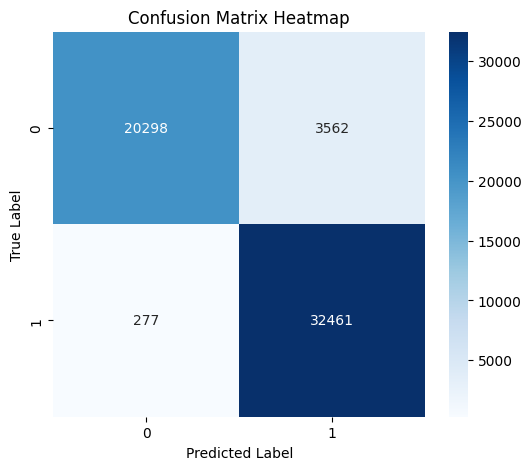

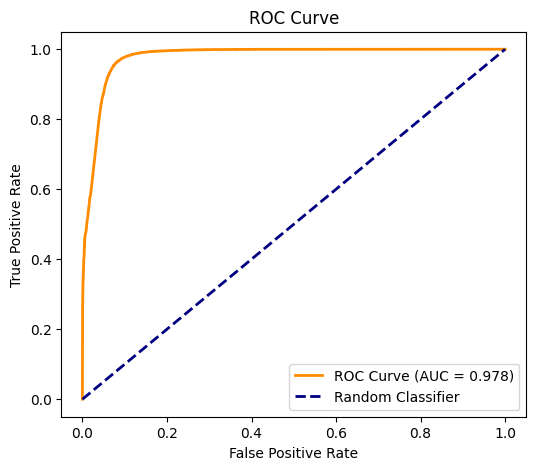


==================== EVALUACIÓN DEL MODELO DE KAREN ====================
Métricas clave del desempeño del modelo:
--------------------------------------------------------------
              precision  recall  f1-score
0                0.9865  0.8507    0.9136
1                0.9011  0.9915    0.9442
accuracy         0.9322  0.9322    0.9322
macro avg        0.9438  0.9211    0.9289
weighted avg     0.9371  0.9322    0.9313
--------------------------------------------------------------
Accuracy: 0.9322



In [141]:
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred = karen_modelo[1].predict(X_test)
plot_confusion_matrix(trainData['Label'], y_pred)
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred_proba = karen_modelo[1].predict_proba(X_test)[:, 1]
plot_roc_curve(trainData['Label'], y_pred_proba)
evaluate_pipeline(karen_modelo[1], X_test, trainData['Label'], title = 'Modelo de Karen')

# Algoritmo Marco

In [127]:
marco_modelo = all_models(trainData, text_transformer_basic, {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300})

F1-score promedio en validación cruzada: 0.9080 (+/- 0.0037)


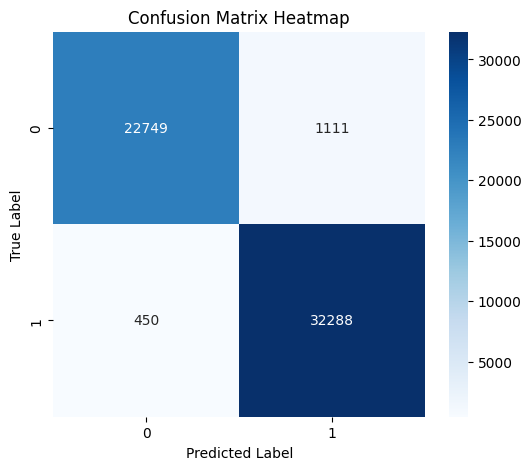

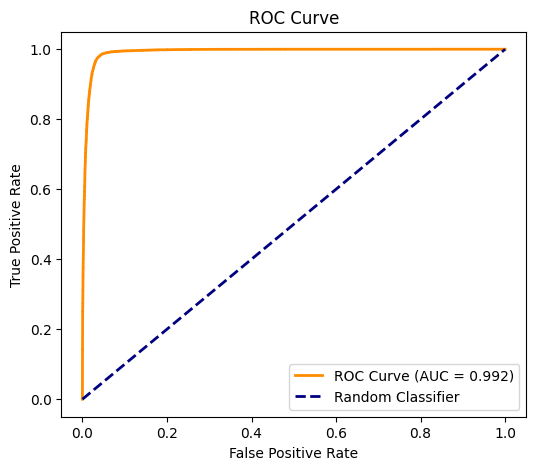


==================== EVALUACIÓN DEL MODELO DE MARCO ====================
Métricas clave del desempeño del modelo:
--------------------------------------------------------------
              precision  recall  f1-score
0                0.9806  0.9534    0.9668
1                0.9667  0.9863    0.9764
accuracy         0.9724  0.9724    0.9724
macro avg        0.9737  0.9698    0.9716
weighted avg     0.9726  0.9724    0.9724
--------------------------------------------------------------
Accuracy: 0.9724



In [140]:
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred = marco_modelo[1].predict(X_test)
plot_confusion_matrix(trainData['Label'], y_pred)
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred_proba = marco_modelo[1].predict_proba(X_test)[:, 1]
plot_roc_curve(trainData['Label'], y_pred_proba)
evaluate_pipeline(marco_modelo[1], X_test,
                  trainData['Label'], title='Modelo de Marco')

# Algoritmo jen

El algoritmo que seleccioné fue Naive Bayes. Este algoritmo es un clasificador probabilistico. Parte del teorema de Bayes de probabilidad combinado con una parte **naive** (ingenua) que tiene como supuesto independencia dentro de las características del texto. Es usado en casos como detección de spam en correos y es útil para predecir el tag de un texto.

Fuentes:

https://www.ibm.com/es-es/think/topics/naive-bayes

https://web.stanford.edu/~jurafsky/slp3/4.pdf

Voy a comenzar por importar las librerías necesarias y hacer una vectorización por TF-IDF

In [129]:
jen_modelo = all_models(trainData, text_transformer_basic)

F1-score promedio en validación cruzada: 0.8026 (+/- 0.0033)


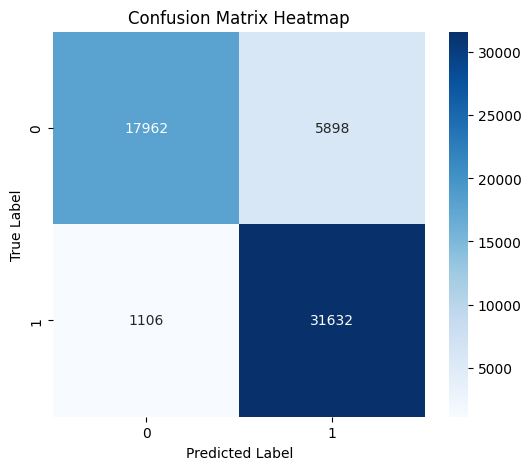

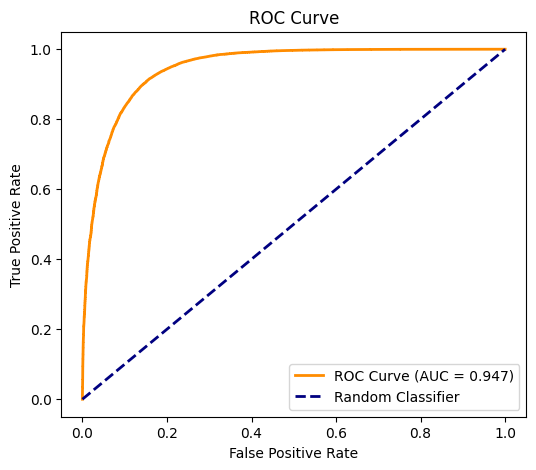


==================== EVALUACIÓN DEL MODELO DE JENIFER ====================
Métricas clave del desempeño del modelo:
--------------------------------------------------------------
              precision  recall  f1-score
0                0.9420  0.7528    0.8368
1                0.8428  0.9662    0.9003
accuracy         0.8763  0.8763    0.8763
macro avg        0.8924  0.8595    0.8686
weighted avg     0.8846  0.8763    0.8736
--------------------------------------------------------------
Accuracy: 0.8763



In [142]:
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred = jen_modelo[1].predict(X_test)
plot_confusion_matrix(trainData['Label'], y_pred)
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred_proba = jen_modelo[1].predict_proba(X_test)[:, 1]
plot_roc_curve(trainData['Label'], y_pred_proba)
evaluate_pipeline(jen_modelo[1], X_test,
                  trainData['Label'], title='Modelo de Jenifer')

# 4.2. Estrategia

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def get_important_words_from_pipeline(pipeline, top_n=20):
    # Extraer el vectorizador y el modelo del pipeline
    vectorizer = pipeline.named_steps['vectorizer']
    model = pipeline.named_steps['classifier']

    # Obtener las palabras (features) y las importancias
    feature_names = np.array(vectorizer.get_feature_names_out())

    # Verificar si el modelo tiene el atributo feature_importances_
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        raise ValueError(
            "El modelo no tiene el atributo 'feature_importances_'.")

    # Ordenar las palabras por importancia (descendente)
    indices = np.argsort(importances)[::-1]

    # Seleccionar las N palabras más importantes
    top_words = feature_names[indices][:top_n]
    top_importances = importances[indices][:top_n]

    # Filtrar y categorizar palabras según su origen
    word_freq = {}
    colors = {}

    for word, importance in zip(top_words, top_importances):
        if "titulo_tfidf__" in word.lower():
            clean_word = word.split("__")[-1]
            colors[clean_word] = "red"
        elif "desc_tfidf__" in word.lower():
            clean_word = word.split("__")[-1]
            colors[clean_word] = "blue"
        else:
            clean_word = word.split("__")[-1]
            colors[clean_word] = "black"

        word_freq[clean_word] = importance

    # Generar la nube de palabras con colores personalizados
    def color_func(word, **kwargs):
        return colors.get(word, "black")

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          color_func=color_func).generate_from_frequencies(word_freq)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Nube de Palabras - {type(model).__name__}')
    plt.show()

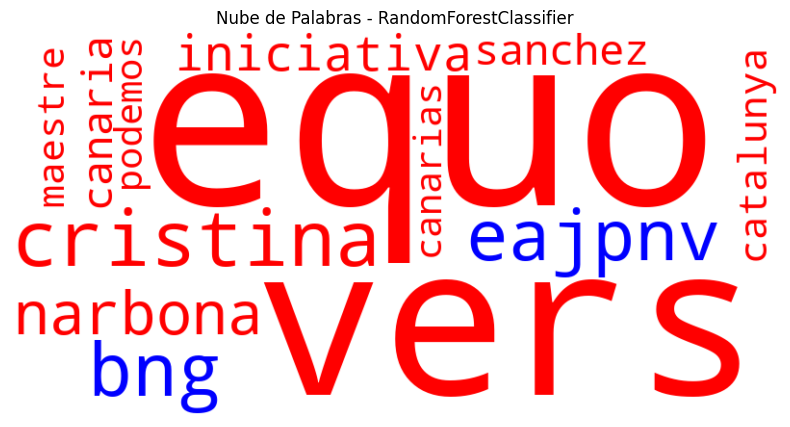

In [153]:
get_important_words_from_pipeline(marco_modelo[1])

In [154]:
testData = getTestData()
nice_test_data = transfor_data(testData)

In [155]:
X_test = nice_test_data[['Titulo', 'Descripcion']]
y_pred = marco_modelo[1].predict(X_test)
y_pred_proba = marco_modelo[1].predict_proba(X_test)[:, 1]

testData['Label'] = y_pred
testData['Probabilidad'] = y_pred_proba
testData['Probabilidad'] = testData['Probabilidad'].apply(lambda x: round(x, 4))

testData.to_csv(f'particion_prueba_estudiantes.csv', sep=';', index=False)